# Project: FBI Gun Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we'll be analysing data associated with the FBI's National Instant Criminal Background Check System (NICS). NICS is used by Federal Firearms Licensees (FFLs) to instantly determine whether a prospective buyer is eligible to buy firearms. Before ringing up the sale, cashiers call in a check to the FBI or to other designated agencies to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase.

The gun data available shows what types of purchases were made, and how many of those purchases were made in each state and in each month. To simplify the data, we will be analysing the total number of gun registrations provided in the data.

In this report we'll be interested in finding trends between states, the demographics of those states an the gun data provided through NICS.

We will be focussing on the following questions:

> ** 1. What are the strongest correlations within the census data and gun registration?**
>
> ** 2. What does the data suggest for statistics without a strong correlation?**
>
> ** 3. Is there a trend between how guns are sold throughout the year?**


In [1]:
#To begin I am importing everything I will need to carry out the report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Loading my data and printing out a few lines in order to perform operations to inspect data types 
#and look for instances of missing or possibly errant data.
census_data = pd.read_csv('U.S. Census Data.csv')
gun_data = pd.read_csv('gun_data.csv')

In [3]:
census_data.head(10)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",NaN,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",NaN,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",NaN,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",NaN,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",NaN,13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%


In [4]:
gun_data.head(10)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
5,2017-09,Colorado,4356.0,0.0,15751.0,13448.0,1007.0,1062,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35873
6,2017-09,Connecticut,4343.0,673.0,4834.0,1993.0,274.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12117
7,2017-09,Delaware,275.0,0.0,1414.0,1538.0,66.0,68,0.0,0.0,...,0.0,0.0,0.0,55.0,34.0,3.0,1.0,2.0,0.0,3502
8,2017-09,District of Columbia,1.0,0.0,56.0,4.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61
9,2017-09,Florida,10784.0,0.0,39199.0,17949.0,2319.0,1721,1.0,18.0,...,0.0,0.0,0.0,11.0,9.0,0.0,0.0,1.0,0.0,77390


As both dataframes have data by state, I will therefore continue the majority of my analysis by state. However I will also analyse the data by month.

In [5]:
#Getting an idea of how much data I am dealing with
print(census_data.shape)
print(" ")
print(gun_data.shape)

(65, 52)
 
(12485, 27)


In [6]:
gun_data.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [7]:
census_data.dtypes

Fact              object
Fact Note         object
Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Oklahoma          object
Oregon            object
Pennsylvania      object


In [8]:
gun_data.count()

month                        12485
state                        12485
permit                       12461
permit_recheck                1100
handgun                      12465
long_gun                     12466
other                         5500
multiple                     12485
admin                        12462
prepawn_handgun              10542
prepawn_long_gun             10540
prepawn_other                 5115
redemption_handgun           10545
redemption_long_gun          10544
redemption_other              5115
returned_handgun              2200
returned_long_gun             2145
returned_other                1815
rentals_handgun                990
rentals_long_gun               825
private_sale_handgun          2750
private_sale_long_gun         2750
private_sale_other            2750
return_to_seller_handgun      2475
return_to_seller_long_gun     2750
return_to_seller_other        2255
totals                       12485
dtype: int64

In [9]:
#Only the totals column has data for each state, therefore this would be the most relevant to use going forward
#So I can drop all the other info out
gun_data.drop(['permit','permit_recheck','handgun','long_gun','other',
               'multiple','admin','prepawn_handgun','prepawn_long_gun','prepawn_other','redemption_handgun',
              'redemption_long_gun','redemption_other','returned_handgun','returned_long_gun',
              'returned_other','rentals_handgun','rentals_long_gun','private_sale_handgun',
              'private_sale_long_gun','private_sale_other','return_to_seller_handgun','return_to_seller_long_gun',
              'return_to_seller_other'],axis=1,inplace=True)

#renaming the totals tab to be more specific for when I combine it with census data
gun_data['total_gun_checks'] = gun_data['totals'] 
gun_data.drop('totals',axis=1,inplace=True)
gun_data.head()

,month,state,total_gun_checks
0,2017-09,Alabama,32019
1,2017-09,Alaska,6303
2,2017-09,Arizona,28394
3,2017-09,Arkansas,17747
4,2017-09,California,123506


As both data sets are quite different in their structure, I will clean them both seperately in order to keep things neat.

### Data Cleaning

Census_data has data for each state showing statistics for the populations of each state - Each state is a column gun_data has data for each state throughout a number of years, it also includes additional US territories that are not states such as Guam, Mariana Islanda and Virgin Islands.

As the Census Data has the states as column names, and gun_data has states as a row value I will have to align the two to be in the same format and make the state value an index.

I will then merge the data sets in order to make it easier to manipulate the data further down the report.

#### Part A - Gun Data Cleaning

In [10]:
#Firstly I want to group the gun data into states 
#This is so that it is easier to analyse and I can merge it with the census data
gun_states = gun_data.groupby('state').sum()
gun_states.head()

,total_gun_checks
state,
Alabama,6706079
Alaska,1137643
Arizona,4425714
Arkansas,3752633
California,19014063


In [11]:
#I also want to group the data seperately by month as this might be interesting to analyse too
gun_months = gun_data.groupby('month').sum()
gun_months.head()

,total_gun_checks
month,
1998-11,21176
1998-12,870722
1999-01,585974
1999-02,690215
1999-03,741687


#### Part B - Census Data

In [12]:
#I am making it so that the index refers to the Fact, rather than the position
census_data.index = census_data['Fact']

In [13]:
#I can then delete the obsolete rows from making Fact the index
del census_data['Fact']
del census_data['Fact Note']

In [14]:
#I can now transpose the table so that it is in the same format as the gun data
census_data_trans = census_data.T
census_data_trans.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""


#### Part C - Merging datasets

In [15]:
#I can now merge the data using join so that it merges on the index
#By using inner I only end up with states that are in both data sets 
#I will lose the irrelevant rows, which is what I want
states_data_unclean = gun_states.join(census_data_trans,on=None,how='inner')
states_data_unclean.head()

,total_gun_checks,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Alabama,6706079,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
Alaska,1137643,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
Arizona,4425714,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
Arkansas,3752633,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
California,19014063,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""


In [16]:
#Checking data types in order to analyse data properly
states_data_unclean.dtypes

total_gun_checks                                                                          int64
Population estimates, July 1, 2016,  (V2016)                                             object
Population estimates base, April 1, 2010,  (V2016)                                       object
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)    object
Population, Census, April 1, 2010                                                        object
Persons under 5 years, percent, July 1, 2016,  (V2016)                                   object
Persons under 5 years, percent, April 1, 2010                                            object
Persons under 18 years, percent, July 1, 2016,  (V2016)                                  object
Persons under 18 years, percent, April 1, 2010                                           object
Persons 65 years and over, percent,  July 1, 2016,  (V2016)                              object
Persons 65 years and over, percent, Apri

In [17]:
#To find out how many columns I need to check the shape of the Data Frame
states_data_unclean.shape

(50, 66)

#### Part D - Cleaning Data Types

In [18]:
# making a function to parse the string percentage data with '%' symbol
def parse_str_percent(string_percent):
    return float(string_percent.strip('%'))/100

In [19]:
#Here I am going through each column of my unclean data, cleaning it into the relevant format 
#and then adding it as a new column in my clean dataframe
#After that I have then carried over the column titles
states_data = pd.DataFrame(index=states_data_unclean.index,)
for j in range(66):
    series_x = states_data_unclean.iloc[:,j].astype(str)
    for i in range(len(series_x)):
            series_x[i] = series_x[i].replace('$','')
            if (series_x[i][-1]=='%'):
                series_x[i]=parse_str_percent(series_x[i])
            elif (series_x[i][-1]!='%'):
                try:
                    series_x[i]=int(series_x[i].replace(',',''))
                except ValueError:
                    try:
                        series_x[i]=float(series_x[i].replace(',',''))
                    except ValueError:
                        series_x[i]=np.nan
    series_x.fillna(series_x.mean(),inplace=True)
    states_data[j]= series_x
states_data.columns = states_data_unclean.columns


In [20]:
#Just a quick check to ensure everything is in the correct format
states_data.head()

#Doesn't look like Percentages are pulling through properly??

,total_gun_checks,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Alabama,6706079,4863300,4780131,0.017,4779736,0.060,0.064,0.226,0.237,0.161,...,374153,203604,137630,92219,272651,41943,316984,94.4,50645.33,NaN
Alaska,1137643,741894,710249,0.045,710231,0.073,0.076,0.252,0.264,0.104,...,68032,35402,22141,13688,51147,7953,56091,1.2,570640.95,NaN
Arizona,4425714,6931071,6392301,0.084,6392017,0.063,0.071,0.235,0.255,0.169,...,499926,245243,182425,135313,344981,46780,427582,56.3,113594.08,NaN
Arkansas,3752633,2988248,2916025,0.025,2915918,0.064,0.068,0.236,0.244,0.163,...,231959,123158,75962,35982,189029,25915,192988,56.0,52035.48,NaN
California,19014063,39250017,37254522,0.054,37253956,0.063,0.068,0.232,0.250,0.136,...,3548449,1852580,1320085,1619857,1819107,252377,3176341,239.1,155779.22,NaN


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

In [21]:
states_data.columns

Index([u'total_gun_checks', u'Population estimates, July 1, 2016,  (V2016)',
       u'Population estimates base, April 1, 2010,  (V2016)',
       u'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       u'Population, Census, April 1, 2010',
       u'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       u'Persons under 5 years, percent, April 1, 2010',
       u'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       u'Persons under 18 years, percent, April 1, 2010',
       u'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       u'Persons 65 years and over, percent, April 1, 2010',
       u'Female persons, percent,  July 1, 2016,  (V2016)',
       u'Female persons, percent, April 1, 2010',
       u'White alone, percent, July 1, 2016,  (V2016)',
       u'Black or African American alone, percent, July 1, 2016,  (V2016)',
       u'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       u'Asia

In [22]:
#This function is the same used in the lesson to find the Pearson's correlation coefficient
def correlation(x, y):
    '''
    Pearson's Correlation Coefficient formula:
    correlation = average of (x in standard units) times (y in standard units)
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    '''
    x_std = x.std(ddof=0)
    y_std = y.std(ddof=0)
    x_mean = x.mean()
    y_mean = y.mean()
    correlation = (((x - x_mean)/x_std) * ((y - y_mean)/y_std)).mean()
    return correlation

In [23]:
data_correlation = {}
for column in states_data:
    data_correlation[column] = correlation(states_data[column],states_data['total_gun_checks'])
    correlation_series = pd.Series(data=data_correlation)
    
correlation_series.sort_values(inplace=True)

In [24]:
correlation_series.shape

(66L,)

### Research Question 1 - What are the strongest correlations within the census data and gun registration?


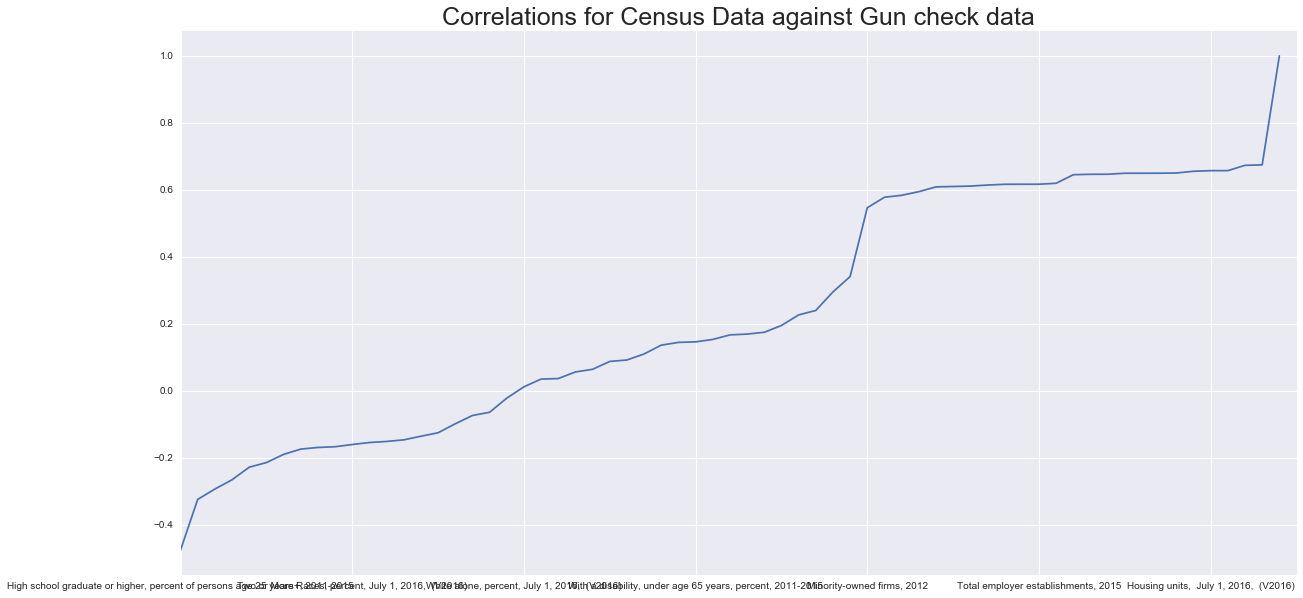

In [25]:
correlation_plot = correlation_series.plot(figsize=(20,10))
correlation_plot.set_title('Correlations for Census Data against Gun check data', fontsize=25)

In [26]:
correlation_series.nlargest(10)

total_gun_checks                                      1.000000
Total manufacturers shipments, 2012 ($1,000)          0.674450
Veterans, 2011-2015                                   0.673238
Households, 2011-2015                                 0.657333
Housing units,  July 1, 2016,  (V2016)                0.657252
Housing units, April 1, 2010                          0.655460
Veteran-owned firms, 2012                             0.650293
Population estimates, July 1, 2016,  (V2016)          0.649697
Population estimates base, April 1, 2010,  (V2016)    0.649583
Population, Census, April 1, 2010                     0.649580
dtype: float64

In [27]:
correlation_series.nsmallest(10)

High school graduate or higher, percent of persons age 25 years+, 2011-2015       -0.475959
In civilian labor force, female, percent of population age 16 years+, 2011-2015   -0.324605
Total retail sales per capita, 2012                                               -0.293659
In civilian labor force, total, percent of population age 16 years+, 2011-2015    -0.266000
American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)          -0.228430
Median household income (in 2015 dollars), 2011-2015                              -0.214555
Per capita income in past 12 months (in 2015 dollars), 2011-2015                  -0.190280
Median selected monthly owner costs -without a mortgage, 2011-2015                -0.174294
Persons 65 years and over, percent,  July 1, 2016,  (V2016)                       -0.169444
Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015          -0.167232
dtype: float64

The strongest positive correlation is Total manufacturers shipments, however this seems more likely to be coincidence than causation.

Within the other strong positive correlations are 'Veteran's' and 'Veteran-owned firms', which would suggest that the more veterans there are in a given state, the more likely it is that that state has a high number of gun registrations.

Finally, the remaining strong positive correlations are based on population sizes, which isn't a surprise because as the population grows the flat number of gun registrations will likely grow too.

The strongest negative correlation is 'High school graduate or higher, percent of persons age 25 years' which would suggest that the more people that are educated to High School level in a state, the less likely it is that that state will have a high gun registration count. It is also supported with the correlation on 'Bachelor's degree or higher, percent of persons age 25 years+' which, although the correlation isn't as strong, is still negative. 

Therefore this suggests that the higher the standards of education in a state, the less likely for that state to have high gun registrations.

The remaining correlations aren't particularly significant.

### Research Question 2  - What does the data suggest for statistics without a strong correlation?

In [28]:
correlation_series_abs = correlation_series.abs()

In [29]:
correlation_series_abs.nsmallest(20)

White alone, percent, July 1, 2016,  (V2016)                                             0.011658
Asian alone, percent, July 1, 2016,  (V2016)                                             0.022284
Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015               0.034793
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)    0.036332
Persons under 5 years, percent, July 1, 2016,  (V2016)                                   0.056014
Persons under 5 years, percent, April 1, 2010                                            0.064058
Median gross rent, 2011-2015                                                             0.064368
Population per square mile, 2010                                                         0.073982
Land area in square miles, 2010                                                          0.087509
Persons  without health insurance, under age 65 years, percent                           0.091782
Median selected mont

It is worth noting that even weak correlations can tell us something about a dataset.

It is widely assumed that race and gun use is linked, however this data would suggest the opposite - that there is no link between race and gun registration.

Similarly the age distribution doesn't appear to be a factor in the number of gun registrations - indicating that it is likely that both younger and older ones are registering guns.

This emphasises how perception can differ from the statistical evidence.

### Research Question 3 - Is there a trend between how guns are sold throughout the year?

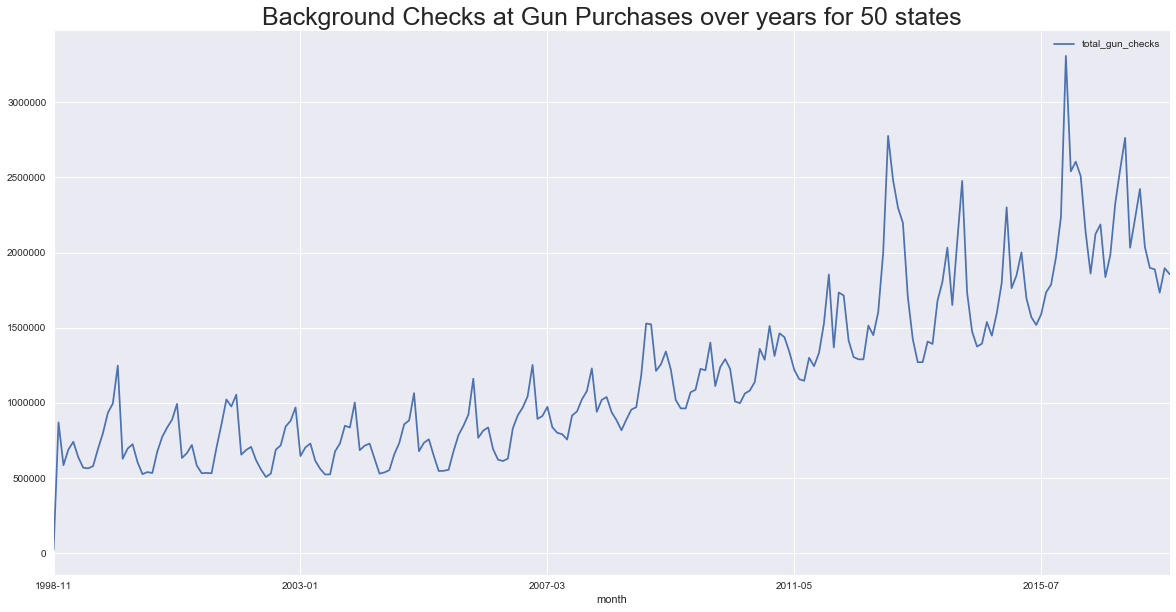

In [30]:
gun_months_plot = gun_months.plot(figsize=(20,10))
gun_months_plot.set_title('Background Checks at Gun Purchases over years for 50 states', fontsize=25)

There appears to be a steady trend from 1999 through to 2007, therefore it would be good to analyse these years together and treat them as a seperate dataset to the years 2008-2016.

1998 and 2017 do not have a full year's worth of data so these will be discounted.

In [31]:
gun_months.head()

,total_gun_checks
month,
1998-11,21176
1998-12,870722
1999-01,585974
1999-02,690215
1999-03,741687


[]

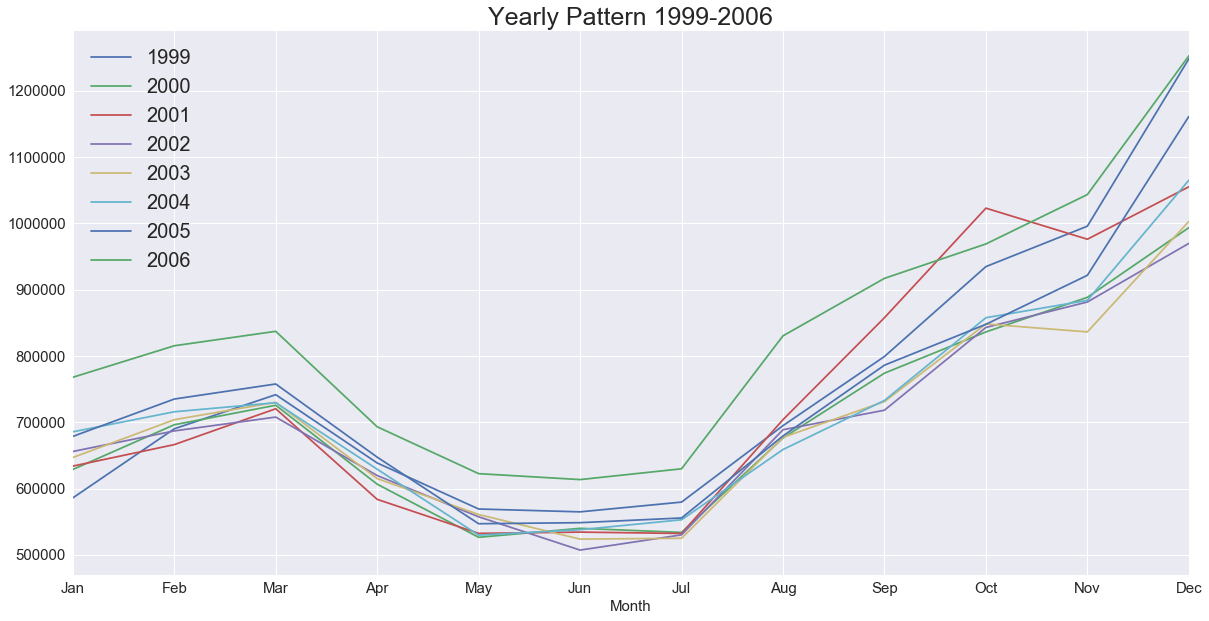

In [32]:
gun_months_annual_plot = gun_months.loc['1999':'2000'].plot(figsize=(20,10),fontsize=15) 
#added the year 1999's plot first in order to get the sizing of the graph
legend =['1999']
for i in range(2000,2007): #excluding 1998 and 2017, because they are not complete
    gun_months_annual_plot = gun_months.loc[str(i):str(i+1)].plot(ax=gun_months_annual_plot)
    legend.append(str(i))
gun_months_annual_plot.legend(legend,fontsize=20)
gun_months_annual_plot.set_xticks(np.arange(12))
gun_months_annual_plot.set_xticklabels(pd.Series(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']),fontdict={
     'fontsize': 15,
     'fontweight': 15})
gun_months_annual_plot.set_title('Yearly Pattern 1999-2006', fontsize=25)
gun_months_annual_plot.set_xlabel('Month', fontsize=15)
gun_months_annual_plot.plot()


[]

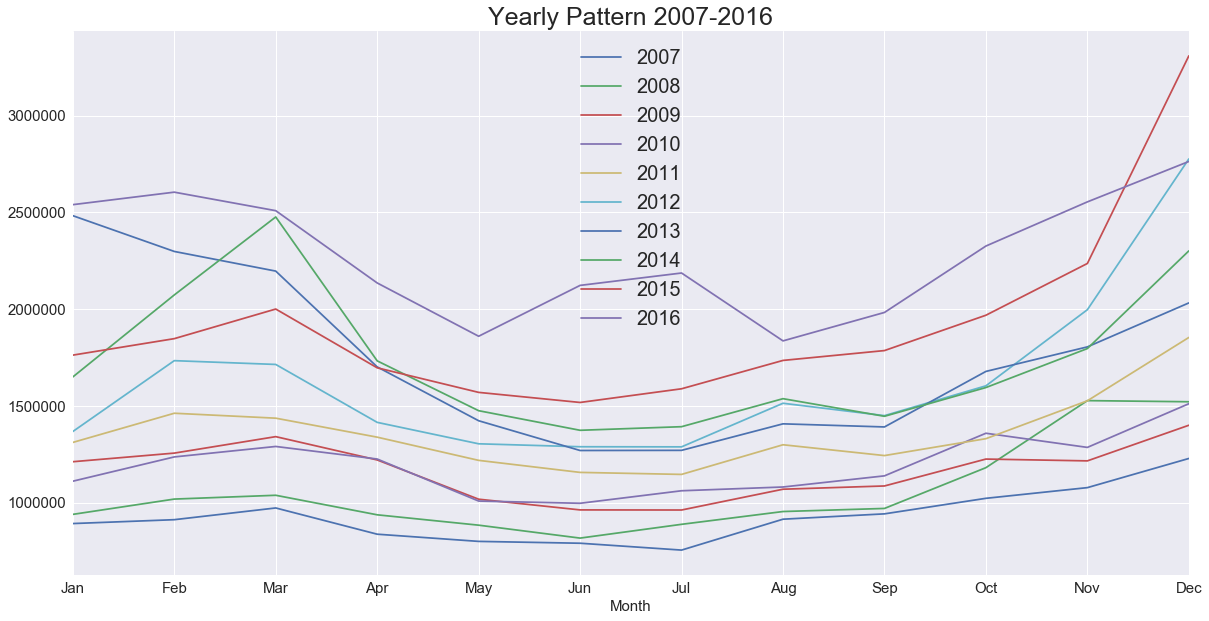

In [33]:
gun_months_annual_plot = gun_months.loc['2007':'2008'].plot(figsize=(20,10),fontsize=15) 
#added the year 1999's plot first in order to get the sizing of the graph
legend =['2007']
for i in range(2008,2017): #excluding 1998 and 2017, because they are not complete
    gun_months_annual_plot = gun_months.loc[str(i):str(i+1)].plot(ax=gun_months_annual_plot)
    legend.append(str(i))
gun_months_annual_plot.legend(legend,fontsize=20)
gun_months_annual_plot.set_xticks(np.arange(12))
gun_months_annual_plot.set_xticklabels(pd.Series(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']),fontdict={
     'fontsize': 15,
     'fontweight': 15})
gun_months_annual_plot.set_title('Yearly Pattern 2007-2016', fontsize=25)
gun_months_annual_plot.set_xlabel('Month', fontsize=15)
gun_months_annual_plot.plot()


In [34]:
gun_annual = pd.DataFrame(gun_months.loc['1999':'2000'].T)
gun_annual.index = (['1999'])
gun_annual.columns = (pd.Series(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']))

In [35]:
gun_annual

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1999,585974,690215,741687,638666,569220,564912,579634,694980,799310,934922,995894,1248333


In [39]:
gun_months.dtypes

total_gun_checks    int64
dtype: object

In [37]:
for i in range(2000,2017): #excluding 1998 and 2017, for they are not complete
    row = pd.DataFrame(gun_months.loc[str(i):str(i+1)].T, index=[str(i)])
    print row
    gun_annual.append(row)
gun_annual

month  2000-01  2000-02  2000-03  2000-04  2000-05  2000-06  2000-07  2000-08  \
2000       NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

month  2000-09  2000-10  2000-11  2000-12  
2000       NaN      NaN      NaN      NaN  
month  2001-01  2001-02  2001-03  2001-04  2001-05  2001-06  2001-07  2001-08  \
2001       NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

month  2001-09  2001-10  2001-11  2001-12  
2001       NaN      NaN      NaN      NaN  
month  2002-01  2002-02  2002-03  2002-04  2002-05  2002-06  2002-07  2002-08  \
2002       NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

month  2002-09  2002-10  2002-11  2002-12  
2002       NaN      NaN      NaN      NaN  
month  2003-01  2003-02  2003-03  2003-04  2003-05  2003-06  2003-07  2003-08  \
2003       NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

month  2003-09  2003-10  2003-11  2003-12  
2003       NaN      NaN      NaN      Na

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1999,585974,690215,741687,638666,569220,564912,579634,694980,799310,934922,995894,1248333


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!